In [75]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [76]:
warnings.filterwarnings("ignore",category=UserWarning)

In [77]:
#Load Combine Data
with open("combine-data.json", "r", encoding="utf-8") as f:
    combine_data = json.load(f)

In [78]:
# Flatten the dataset
flattened_data = []

for entry in combine_data:
    if "intent" in entry and "question" in entry:
        flattened_data.append({
            "intent": entry["intent"],
            "question": entry["question"]
        })


In [79]:
flattened_data

[{'intent': 'Digitall-Installment-Loan',
  'question': 'What is digital installment in Wing Bank'},
 {'intent': 'Digitall-Installment-Loan',
  'question': 'What are feature of Wing Bank’s Digital Installment'},
 {'intent': 'Digitall-Installment-Loan',
  'question': "What are the fee charges associated with Wing Bank's digital installment services"},
 {'intent': 'Digitall-Installment-Loan',
  'question': 'How can I check my digital installment eligibility'},
 {'intent': 'Digitall-Installment-Loan',
  'question': 'What is the minimum purchase amount to use digital installment'},
 {'intent': 'Digitall-Installment-Loan',
  'question': 'What is the maximum loan amount for a digital installment plan'},
 {'intent': 'Digitall-Installment-Loan',
  'question': 'Where can I use the digital installment service'},
 {'intent': 'Digitall-Installment-Loan',
  'question': 'How do I repay a digital installment loan'},
 {'intent': 'Digitall-Installment-Loan',
  'question': 'How do I apply for digital ins

In [80]:
#Convert to Dataframe
df = pd.DataFrame(flattened_data)

In [81]:
df.head()

,intent,question
0,Digitall-Installment-Loan,What is digital installment in Wing Bank
1,Digitall-Installment-Loan,What are feature of Wing Bank’s Digital Instal...
2,Digitall-Installment-Loan,What are the fee charges associated with Wing ...
3,Digitall-Installment-Loan,How can I check my digital installment eligibi...
4,Digitall-Installment-Loan,What is the minimum purchase amount to use dig...


In [82]:
from sklearn.preprocessing import LabelEncoder

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["intent"])


# Save the label mappings to a JSON file
intent_mapping = dict(zip(df["label"], df["intent"]))
with open("label-mapping.json", "w", encoding="utf-8") as f:
    json.dump(intent_mapping, f, ensure_ascii=False, indent=4)


In [83]:
df.dtypes

intent      object
question    object
label        int64
dtype: object

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   intent    364 non-null    object
 1   question  364 non-null    object
 2   label     364 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.7+ KB


In [85]:
df.columns

Index(['intent', 'question', 'label'], dtype='object')

In [86]:
df.head()

,intent,question,label
0,Digitall-Installment-Loan,What is digital installment in Wing Bank,2
1,Digitall-Installment-Loan,What are feature of Wing Bank’s Digital Instal...,2
2,Digitall-Installment-Loan,What are the fee charges associated with Wing ...,2
3,Digitall-Installment-Loan,How can I check my digital installment eligibi...,2
4,Digitall-Installment-Loan,What is the minimum purchase amount to use dig...,2


In [87]:
df.tail()

,intent,question,label
359,Mastercard-Gold-One-Card,How does the numberless design protect my Gold...,6
360,Mastercard-Gold-One-Card,Is the Gold One Card internationally accepted,6
361,Mastercard-Gold-One-Card,What makes the Gold One Card environmentally f...,6
362,Mastercard-Gold-One-Card,Can I get a supplementary Gold One Card for a ...,6
363,Mastercard-Gold-One-Card,What tools does the Wing Bank app offer for Go...,6


In [88]:
df[df.duplicated()]

,intent,question,label


In [90]:
df.to_csv('intent-question.csv', index=False)

In [91]:
df.to_excel('intent-question.xlsx', index=False)

In [92]:
df.to_excel('intent-question-label.xlsx', index=False)

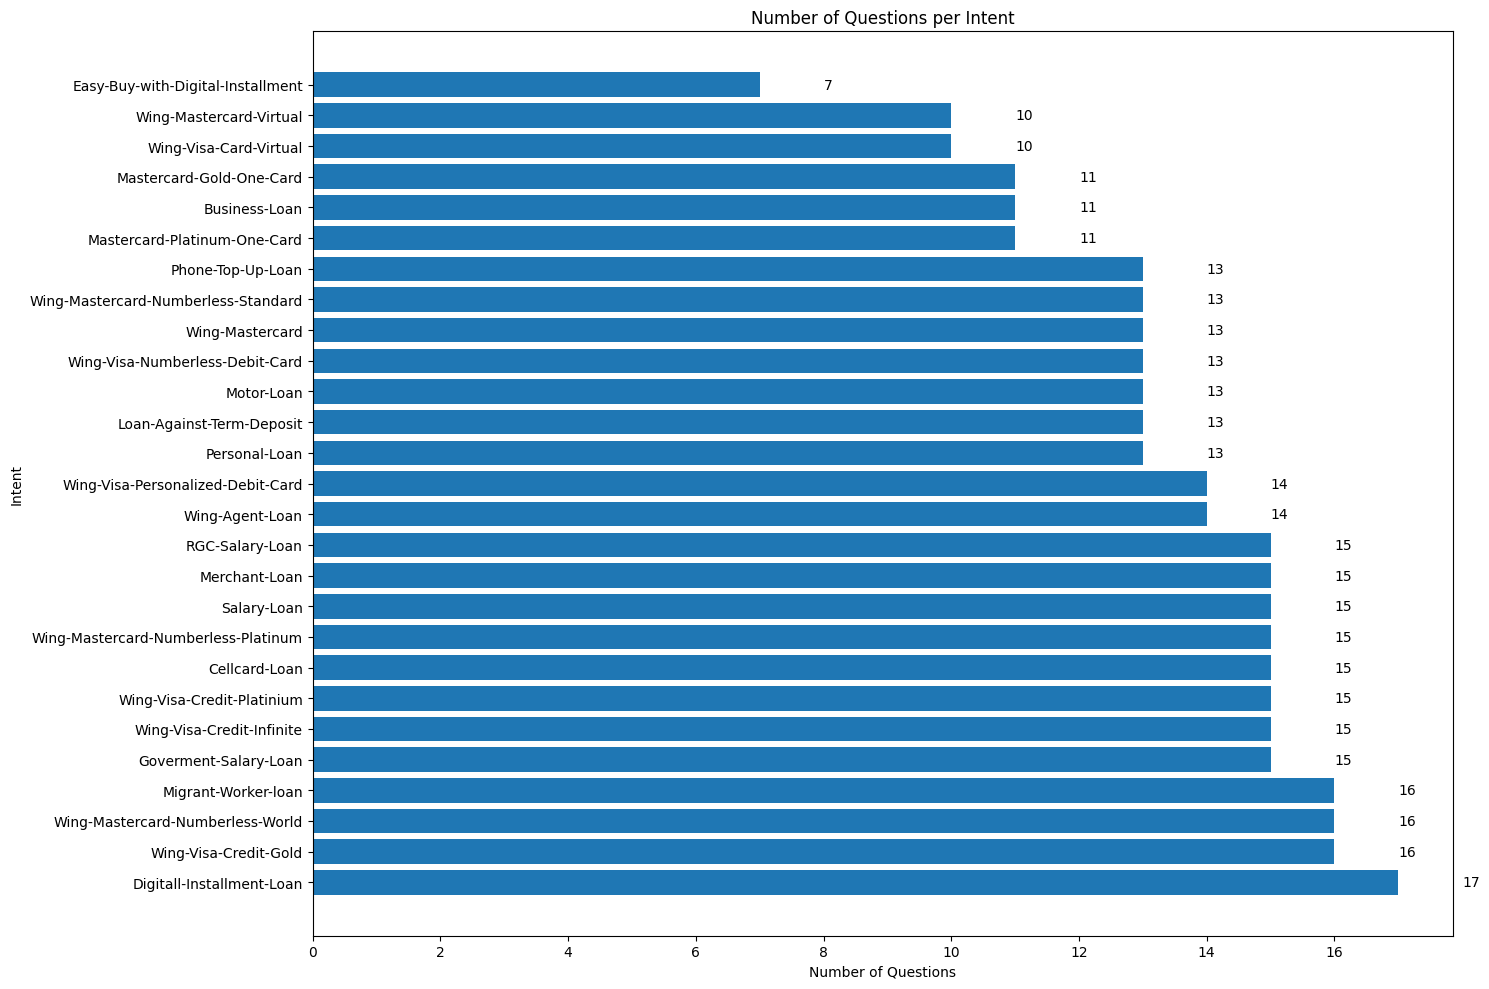

In [89]:
# Total Question in Each Intent
import matplotlib.pyplot as plt

# Count the number of questions for each intent
intent_counts = df['intent'].value_counts()

# Plot
plt.figure(figsize=(15,10))
bars = plt.barh(intent_counts.index, intent_counts.values)
plt.xlabel('Number of Questions')
plt.ylabel('Intent')
plt.title('Number of Questions per Intent')

# Add text annotations (value) to the right of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1,                    
             bar.get_y() + bar.get_height()/2,  
             str(width),                    
             va='center')                   

plt.tight_layout()
plt.show()
